In [31]:
import pandas


df = pandas.read_csv("benchmark.csv")
# removes save providers != run providers
#df = df[
#    (df["run-providers"] == "CUDAExecutionProvider,CPUExecutionProvider")
#    & (df["save-opt"] == "GPU")
#    | (df["run-providers"] == "CPUExecutionProvider") & (df["save-opt"] == "CPU")
#]
df = df[~df.name.str.contains("onnx.")]
# removes save AOT
#df = df[df["save-aot"] == 0]
df = df.copy()
df["AOT"] = df.apply(lambda r: ("AOT" if r["save-aot"] == 1 else ""), axis=1)
df["run-aot"] = df.apply(lambda r: ("AOT" if r["run-aot"] == 1 else ""), axis=1)
df["rewriter"] = df.apply(lambda r: ("REW" if r["save-rewriter"] else ""), axis=1)
df["prov"] = df["run-providers"].apply(lambda s: "GPU" if "CUDA" in s else "CPU")
df.head(3).T

,0,1,2
processor,x86_64,x86_64,x86_64
cores,32,32,32
cuda,1,1,1
cuda_count,1,1,1
cuda_name,NVIDIA GeForce RTX 4090,NVIDIA GeForce RTX 4090,NVIDIA GeForce RTX 4090
cuda_capa,"(8, 9)","(8, 9)","(8, 9)"
name,simple_dynamo.onnx,simple_dynamo.onnx,simple_dynamo.onnx
run-providers,CPUExecutionProvider,CPUExecutionProvider,CPUExecutionProvider
run-opt,all,none,all
save-opt,NaN,NaN,NaN


In [32]:
df["save-export"]

0     dynamo
1     dynamo
2     dynamo
3     dynamo
4     dynamo
5     dynamo
6     dynamo
7     dynamo
8     script
9     script
10    script
11    script
12    script
13    script
14    script
15    script
88    dynamo
89    dynamo
90    dynamo
91    dynamo
92    dynamo
93    dynamo
94    dynamo
95    dynamo
Name: save-export, dtype: object

In [33]:
df.columns

Index(['processor', 'cores', 'cuda', 'cuda_count', 'cuda_name', 'cuda_capa',
       'name', 'run-providers', 'run-opt', 'save-opt', 'save-aot', 'run-aot',
       'save-rewriter', 'save-export', 'average', 'deviation', 'min_exec',
       'max_exec', 'repeat', 'number', 'ttime', 'context_size', 'warmup_time',
       'error', 'step', 'AOT', 'rewriter', 'prov'],
      dtype='object')

In [34]:
piv = pandas.pivot_table(
    df, index=["save-export", "rewriter"], columns=["prov", "run-aot", "run-opt", ], values="average"
)
piv

prov                       CPU                                     GPU  \
run-aot                                        AOT                       
run-opt                    all      none       all      none       all   
save-export rewriter                                                     
dynamo                0.013765  0.013878  0.002835  0.013646  0.001205   
            REW       0.015800  0.015503  0.003959  0.015685  0.000707   
script                0.001266  0.001976  0.001212  0.001932  0.000391   

prov                                                
run-aot                              AOT            
run-opt                   none       all      none  
save-export rewriter                                
dynamo                0.001243  0.000431  0.000971  
            REW       0.000771  0.000491  0.000686  
script                0.000344  0.000713  0.000304

<Axes: ylabel='prov,run-aot,run-opt'>

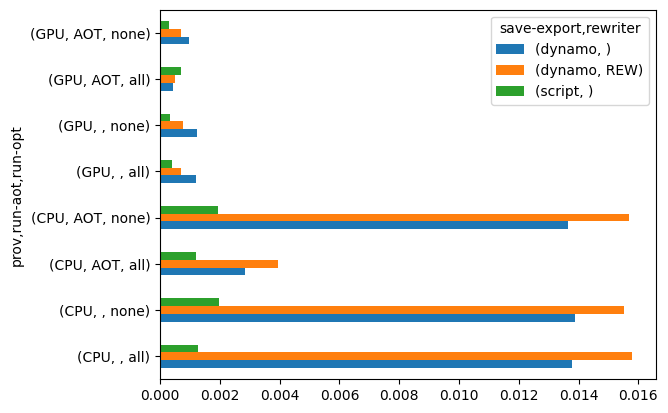

In [35]:
piv.T.plot.barh()